# Datas 

- Source for airports locations: https://openflights.org/data.html (file airlines.dat)
- Source for american airlines and flight scedules: https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236


In [1]:
from library.visuMultiStream import *
print("1")
from library.intervals import *
print("2")
from library.structure import *
print("3")
from library.elemMSGraph import *
print("4")
from library.multiLayers import *
print("5")
from library.sortedcollection import *
print("6")
from library.matrices import *
print("7")
from random import *
print("8")
import seaborn as sns
print("9")

from tulip import tlp
print("10")
import scipy.linalg
print("finished")

sorted collection imported
1
2
3
4
5
6
7
8
9
10
finished


Echelle de temps : 1 mois

In [2]:
t0=0
tend=24*60*31

print(tend)

interval=Interval(t0,tend)

44640


In [3]:
def convertToMinutes(day,hour,minutes):
    return((day-1)*24*60+hour*60+minutes)



def readAirports(airportl):
    dicoAir={}
    f=open("data/planes/airports.dat","r",encoding="utf8")
    #print(f)
    lste=[]
    for line in f:
        line=line.replace("\"",'')
        tab=line.split(",")
        ida=tab[4]
        namea=tab[1]
        country=tab[3]
        print(ida)
        if (ida in dicoAir)==False and (ida in airportl):
            lat=tab[6]
            long=tab[7]
            print("oui")
            dicoAir[ida]=[namea,lat,long]
            lste.append(NodeT(ida,IntervalList([interval])))
    return(dicoAir,lste)
    

def readLinks():
    f=open("data/planes/jan2010.csv",'r')
    n=0
    em=LinkList([])
    careersl=[]
    airportl=[]
    airportPerLay={}
    for line in f:
        if n>0:
            line=line.replace("\"",'')
            tab=line.split(",")
            date=int(tab[0].split("-")[2])
            career=tab[1]
            origin=tab[2]
            dest=tab[3]
            dept=int(tab[4][0]+tab[4][1])*60+int(tab[4][2]+tab[4][3])
            if len(tab[5])>0:
                arrival=int(tab[6][0]+tab[6][1])*60+int(tab[6][2]+tab[6][3])
                inter=Interval((date-1)*24*60+dept,(date-1)*24*60+arrival)
                if arrival<=dept:
                    inter=Interval((date-1)*24*60+dept,(date)*24*60+arrival)
                if not (career in careersl):
                    careersl.append(career)
                if not (origin in airportl):
                    airportl.append(origin)
                if not (dest in airportl):
                    airportl.append(dest)
                if (career in airportPerLay.keys())==False:
                    airportPerLay[career]=[]
                if not origin in airportPerLay[career]:
                    airportPerLay[career].append(origin)
                if not dest in airportPerLay[career]:
                    airportPerLay[career].append(dest)
                em.addLink(Link(IntervalList([inter]),NodeT(origin,IntervalList([interval])),[career],NodeT(dest,IntervalList([interval])),[career],directed=1),cond=0)
        n=n+1
    f.close()
    return(em,sorted(careersl),sorted(airportl),airportPerLay)

    
def readCarriers(carL):
    f=open("data/planes/L_UNIQUE_CARRIERS.csv","r")
    n=0
    liste=[]
    dicoCarreer={}
    for line in f :
        if n>0:
            line=line.replace("\"",'')
            tab=line.split(",")
            tab[-1]=tab[-1].rstrip("\n")
            code=tab[0]
            name=tab[1]
            if (code in liste) == False and (code in carL)==True :
                liste.append(code)
                dicoCarreer[code]=name
        n=n+1
    comp=Aspect("carrier",liste)
    return(comp,dicoCarreer)

# Principe :

In the datasets, they are to many airports and carriers (not american and unused). So we begin to read the links to know which airports and carriers are used and we then read their datasets to collect their detailed informations (stored into dictionnaries)

In [4]:
em,carL,airportl,airportperlay=readLinks()

dicoAir,nodes=readAirports(airportl)

laystr=LayerStruct([Aspect("compagnies",carL)])
listLay=[]

carriers,dicoCarreer =readCarriers(carL)

for l in carriers.giveElemLayer():
    nl=NodeTList([])
    for no in airportperlay[l]:
        nl.addNodeT(NodeT(no,IntervalList([interval])))
    listLay.append(Layer(laystr,[l],interval,nl))

layers=LayerList(listLay)

m=MultiStream(interval,laystr,layers,em,nodes=airportl)          

multi=m.extractML()

GKA
MAG
HGU
LAE
POM
WWK
UAK
GOH
SFJ
THU
AEY
EGS
HFN
HZK
IFJ
KEF
PFJ
RKV
SIJ
VEY
YAM
\N
\N
YAY
YAZ
YBB
YBC
YBG
YBK
YBL
YBR
YCB
YCD
YCG
YCH
YCL
YCO
YCT
YCW
YCY
YZS
YDA
YDB
\N
YDF
YDL
YDN
YDQ
YEG
YEK
YEN
YET
YEU
YEV
YFB
YFC
YFE
YFO
YFR
YFS
YGK
YGL
YGP
YGQ
YGR
YHB
YHD
YHI
YHK
YHM
YHU
YHY
YHZ
YIB
YIO
YJN
YJT
YKA
YKF
YKL
YKY
YKZ
YLD
YLJ
YLL
YLT
YLW
YMA
YMJ
YMM
YMO
YMW
YMX
YNA
YND
YNM
YOC
YOD
YOJ
YOW
YPA
YPE
YPG
\N
YPL
YPN
YPQ
YPR
YPY
YQA
YQB
YQF
YQG
YQH
YQK
YQL
YQM
YQQ
YQR
YQT
YQU
YQV
YQW
YQX
YQY
YQZ
YRB
YRI
YRJ
YRM
YRT
YSB
YSC
YSJ
YSM
YSR
YSU
YSY
YTE
YTH
YTR
YTS
YTZ
YUB
YUL
YUT
YUX
YUY
YVC
YVG
YVM
YVO
YVP
YVQ
YVR
YVT
YVV
YWA
YWG
YWK
YWL
YWY
YXC
YXD
YXE
YXH
YXJ
YXL
YXP
YXR
YXS
YXT
YXU
YXX
YXY
YYB
YYC
YYD
YYE
YYF
YYG
YYH
YYJ
YYL
YYN
YYQ
YYR
YYT
YYU
YYW
YYY
YYZ
YZD
YZE
YZF
YZH
YZP
YZR
YZT
YZU
YZV
YZW
YZX
ZFA
ZFM
QLD
BUJ
BJA
ALG
DJG
\N
\N
VVZ
\N
TMR
GJL
MZW
\N
AAE
CZL
TEE
HRM
TID
\N
TIN
CFK
TAF
TLM
ORN
BFW
MUW
AZR
BSK
ELG
GHA
HME
INZ
TGR
LOO
TMX
OGX
IAM
COO
OUA
BOY
ACC
TML
\N
NYI
TKD
ABJ
BYK
DJ

\N
HAC
\N
\N
\N
OIM
\N
HND
OKO
KWJ
CHN
RSU
\N
KAG
CJU
CHF
PUS
USN
\N
SSN
OSN
GMP
SWU
KPO
TAE
YEC
OKA
\N
DNA
ISG
UEO
MMD
MMY
KTD
SHI
TRA
RNJ
\N
OGN
MNL
CBO
\N
PAG
GES
ZAM
BAG
DTE
\N
\N
SJI
\N
MBO
\N
BQA
\N
TAC
BCD
DGT
MPH
\N
ILO
KLO
PPS
EUQ
COC
GHU
JNI
PRA
ROS
SFN
AEP
COR
\N
FDO
\N
LPG
\N
EPA
HOS
GNR
MDZ
LGS
AFA
CTC
SDE
\N
IRJ
\N
TUC
UAQ
RCU
VDR
\N
\N
VME
LUQ
CNQ
RES
FMA
IGR
AOL
MCS
PSS
PRQ
SLA
JUJ
ORA
\N
ELO
OYA
\N
RCQ
UZU
EHL
CRD
EQS
REL
VDM
PMY
\N
PUD
RGA
RGL
USH
ULA
PMQ
RZA
BHI
CSZ
OVR
GPO
OYO
\N
MDQ
NQN
PEH
RSA
BRC
TDL
VLG
CUT
CPC
CDJ
\N
\N
AQA
AJU
AFL
ARU
BEL
BGX
PLU
BFH
\N
BSB
BAU
BVB
BPG
CAC
\N
CNF
CGR
XAP
CLN
CCM
\N
CAW
CMG
CWB
CRQ
CXJ
CGB
CZS
PPB
MAO
JCR
\N
IGU
FLN
FEN
\N
FOR
GIG
GJM
GYN
\N
GRU
GUJ
ATM
ITA
ITB
IOS
IPN
ITR
IMP
\N
JDF
JPA
JOI
CPV
VCP
LAJ
LIP
LDB
LAZ
\N
MAB
MEU
MGF
MOC
PLL
MCZ
MCP
MVF
\N
MNX
NVT
GEL
NAT
OYK
POA
PHB
POO
PFB
PET
PNZ
PNB
PMG
PVH
RBR
REC
SDU
RAO
SNZ
SJK
SLZ
CGH
SJP
SSZ
SSA
TMT
THE
TFF
TRQ
TEC
\N
TBT
TUR
SJL
PAV
URG
UDI
UBA
VAG
BVH
VIX
\N
QPS
ARI
BBA


YCK
YLE
SUR
YAX
WNN
YNO
XBE
KIF
YOG
YHP
YKU
ZTB
ZLT
YAC
YAG
XKS
YKG
YAT
\N
YBE
YBX
YRF
YCS
YDP
YER
YFA
YFH
YMN
YGB
YGO
YGT
YGW
YGX
YGZ
YQC
CXH
YNS
YHO
YHR
YIK
YIV
AKV
YKQ
YPJ
YLC
YLH
\N
XGR
YMH
YMT
YUD
YNC
YNE
YNL
YOH
YPH
YPM
YPO
YPW
YQD
YQN
YRA
YRL
YSF
YSK
YST
YTL
YVZ
YWP
YXN
YZG
ZAC
ILF
ZBF
ZEM
ZFD
ZGI
ZJN
ZKE
MSA
ZMT
ZPB
ZRJ
ZSJ
ZTM
ZUM
ZWL
BLJ
CBH
BMW
ELU
KMS
HDF
HEI
HGL
SJY
NQT
United Kingdom
CAL
EOI
FIE
NRL
PPW
SOY
NDY
LWK
WRY
LEQ
PZE
VLY
BRR
CFN
\N
CNL
LKN
OSY
Norway
Norway
RET
SDN
SOG
SVJ
SOJ
Norway
VRY
BZG
LCJ
OSD
HFS
KSD
TYF
AGH
SQO
HMV
VNT
QRA
MQP
AAM
MBD
GNZ
ORP
SWX
TLD
DIS
CIP
\N
YVA
WAQ
JVA
BMD
MXT
TVA
WTA
WTS
WAM
WPB
\N
DWB
WMP
\N
WMA
MJA
CBT
DUE
VPE
MSZ
KOU
MJL
TCH
VPY
SRH
CMK
LUD
OND
OMD
SWP
ERS
BOA
MAT
INO
NIO
KRZ
BSU
TSH
LJA
PFR
OUK
GMZ
BTE
KBS
KEN
OXB
SMW
VIL
ESU
EUN
NDR
Cape Verde
Cape Verde
BCO
BEI
DSE
DEM
GDE
GOR
ABK
MTF
TIE
ALU
BSA
MGQ
GLK
BUO
AAC
ATZ
ASV
LKG
MYD
NYK
SRX
TOB
MJI
LAQ
ATB
UYL
PZU
BKZ
TKQ
LDI
MUZ
SHY
TBO
RUA
ULU
DIU
ABR
ABY
oui
AHN
ALM
ALO
oui
ALW


\N
YBW
WSO
\N
\N
WKR
\N
GFO
DYL
\N
TGI
TJL
YZY
OAL
OCW
\N
MHC
SWO
OKM
CUH
CSM
WLD
PWA
DTN
SEP
\N
\N
ADT
\N
\N
\N
\N
\N
\N
IRB
\N
YEL
IKB
\N
DAN
\N
ERG
HCW
\N
\N
BEM
NKT
SUY
OUZ
ABB
QUO
KAA
\N
\N
SGX
\N
JUH
AOG
DQA
ZYI
\N
LDS
AVA
KSS
WTB
TNH
SZV
\N
\N
\N
\N
\N
\N
LII
NTI
WSR
DTB
\N
MEQ
BUW
KAZ
MNA
SGQ
BUU
\N
ILA
OKL
KOX
CMQ
WMB
RCM
DCN
KNO
AMN
\N
HMY
\N
\N
EMT
FAH
IXT
\N
KRQ
QKX
\N
\N
SSF
\N
JAS
\N
MRF
ALE
BQE
CZA
BUY
CCB
\N
EKI
\N
CUB
\N
\N
GDC
\N
HVS
\N
SZT
DU9
\N
\N
\N
\N
RIH
\N
LEE
\N
\N
\N
PPY
DIQ
EIK
ERD
BWX
ERL
\N
CNO
\N
\N
\N
HTR
\N
BWW
\N
\N
\N
PRB
\N
PKX
\N
HAF
HCJ
\N
WJF
CJF
GUZ
UBT
\N
\N
BOX
\N
\N
\N
\N
\N
\N
\N
QUG
\N
\N
\N
TNW
\N
FYJ
\N
\N
\N
\N
PZL
LPF
KJH
HPG
ZQZ
YIE
HNY
AHJ
WOS
\N
IGT
ASN
GMU
\N
NGD
TOI
\N
ETS
\N
EFG
KGW
NDN
BNM
ALX
PKT
GPN
\N
\N
\N
\N
\N
DOH
HZP
\N
\N
\N
\N
\N
HDE
PTT
\N
\N
LXN
\N
CBF
OKK
\N
\N
\N
\N
GBG
GUY
\N
\N
\N
\N
IDP
\N
\N
\N
BBC
PRX
CFV
\N
GXY
\N
OEL
FET
LGD
SZY
MPO
UKT
YBA
\N
BNG
\N
\N
OFK
\N
\N
\N
\N
\N
\N
TFL
\N
TPF
\N
\N
BZC
\N
ITP
\N
REZ
\

In [5]:
m2=m.cut(Interval(0,24*60))
m2=m2.extractLayers([["G4"]])
m2.drawMS("avions1988.fig")

In [6]:
print(dicoAir)

{'STT': ['Cyril E. King Airport', '18.337299346923828', '-64.97339630126953'], 'STX': ['Henry E Rohlsen Airport', '17.701900482177734', '-64.79859924316406'], 'BQN': ['Rafael Hernandez Airport', '18.49489974975586', '-67.12940216064453'], 'PSE': ['Mercedita Airport', '18.00830078125', '-66.56300354003906'], 'SJU': ['Luis Munoz Marin International Airport', '18.4393997192', '-66.0018005371'], 'ITO': ['Hilo International Airport', '19.721399307250977', '-155.04800415039062'], 'FSM': ['Fort Smith Regional Airport', '35.33660125732422', '-94.36740112304688'], 'GFK': ['Grand Forks International Airport', '47.949299', '-97.176102'], 'BOS': ['General Edward Lawrence Logan International Airport', '42.36429977', '-71.00520325'], 'OAK': ['Metropolitan Oakland International Airport', '37.721298', '-122.221001'], 'OMA': ['Eppley Airfield', '41.3032', '-95.894096'], 'OGG': ['Kahului Airport', '20.8986', '-156.429993'], 'ICT': ['Wichita Eisenhower National Airport', '37.649899', '-97.433098'], 'MCI'

## Build the tulip file

The differents layers corresponding to the different carriers are drawn in different colors. We build different subgraphs corresponding to each company.

This is very useful for vizualisation (download tulip http://tulip.labri.fr/TulipDrupal/ ) to open the graph (double click on the graph on the bottom left and chose the "geographic view"

In [7]:
def makeGraph(m,airportl,carL,dicoAir,airportperlay):
    graph=tlp.newGraph()
    latitude=graph.getDoubleProperty("latitude")
    longitude=graph.getDoubleProperty("longitude")
    name = graph.getStringProperty("nameCity")
    code = graph.getStringProperty("code")
    couche = graph.getStringVectorProperty("compagnie")
    color = graph.getColorProperty("viewColor")
    k=len(carL)
    colList=[(randint(0,255),randint(0,255),randint(0,255)) for i in range(k)]
    for n in range(len(airportl)):
        graph.addNode()
        no=graph.nodes()[n]
        code[no]=airportl[n]
        listeAttributs=dicoAir[airportl[n]]
        name[no]=listeAttributs[0]
        latitude[no]=float(listeAttributs[1])
        longitude[no]=float(listeAttributs[2])
    n=0
    for lay in m.giveLayers().giveLayers():
        car=lay.giveLayerLabel()[0]
        sub=graph.addSubGraph(car)
        nliste=airportperlay[car]
        for node1 in nliste :
            no=graph.nodes()[airportl.index(node1)]
            sub.addNode(no)
        #print(car,len(sub.nodes()))
    for e in m.giveLinks().giveListOfLinks():
        n1=graph.nodes()[airportl.index(e.giveNodes()[0].giveNode())]
        n2=graph.nodes()[airportl.index(e.giveNodes()[1].giveNode())]
        graph.addEdge(n1,n2)
        ed=graph.edges()[n]
        n=n+1
        couche[ed]=e.giveLabel()[2]
        color[ed]=colList[carL.index(e.giveLabel()[2][0])]
        sub=graph.subGraphs()[carL.index(e.giveLabel()[2][0])]
        car=e.giveLabel()[2][0]
        codenode=e.giveNodes()[0].giveNode()
        n1=sub.nodes()[airportperlay[car].index(codenode)]
        n2=sub.nodes()[airportperlay[e.giveLabel()[2][0]].index(e.giveNodes()[1].giveNode())]
        sub.addEdge(ed)
    tlp.saveGraph(graph,"grapheplanes2010.tlp")
    return(graph)

graph=makeGraph(m,airportl,carL,dicoAir,airportperlay)

We can then use the library "tulip" to compute classical measures: 

- page ranking: 

In [8]:
pagerank=graph.getDoubleProperty("pageRank")
params = tlp.getDefaultPluginParameters('Page Rank', graph)
params["directed"]=True

success = graph.applyDoubleAlgorithm('Page Rank', pagerank, params)
pr=[]
for n in graph.getNodes():
    pr.append(pagerank[n])

- betweenness centrality:

In [9]:
betweenness=graph.getDoubleProperty("betweeness")
params = tlp.getDefaultPluginParameters('Betweenness Centrality', graph)
params["directed"]=True

success = graph.applyDoubleAlgorithm('Betweenness Centrality', betweenness, params)
bt=[]
for n in graph.getNodes():
    bt.append(betweenness[n]) 

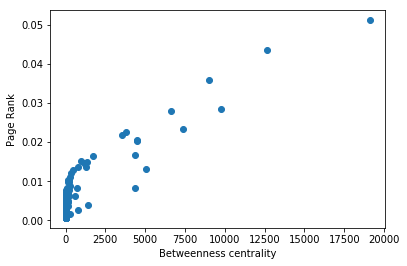

In [10]:
axes = plt.gca()
plt.plot(bt,pr,'o')
axes.set_ylabel('Page Rank')
axes.set_xlabel('Betweenness centrality')
plt.savefig("prVSbc.pdf")
plt.show()


# Intrication

We compute the Burt's matrix which is:

$\begin{pmatrix}
P(1) & P(1|2) & P(1|3) & \dots & P(1|n)\\
P(2|1) & P(2) & P(2|3) & \dots & P(2|n)\\
\vdots & \vdots & \ddots\\
\dots & \dots & \dots & \dots & P(n)
\end{pmatrix}$

$P(i)$ is the probability, taking a flight, that it exists in the compagny $C_i$.

$P(i|j)$ is the probability, taking a flight in $c_j$, that $c_i$ has the same flight.

In [11]:
matintric=multi.computeIntricationMatrixBurt()

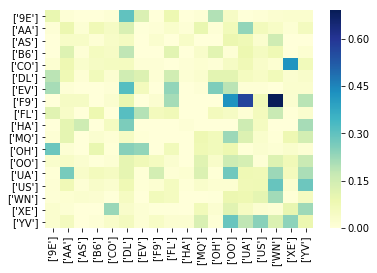

In [12]:
lablist=multi.giveLayersLabels()
sns_plot=sns.heatmap(np.transpose(matintric),cmap="YlGnBu",xticklabels=lablist,yticklabels=lablist)
fig = sns_plot.get_figure()
fig.savefig("intricplanes.pdf")
plt.show()


We compute its maximal left eigenvalue and the eigenvector associated. If the matrix isn't reductible (if we have all the nodes in the same connex component), this eigenvalue is unique and the eigenvector has all its coefficients of the same sign.

In [13]:
valp,vectp=valeurPropreMax(np.transpose(matintric),1000)

We draw the eigenvector ordered:

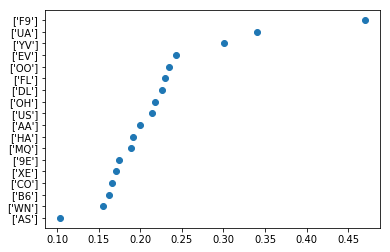

In [14]:
l=SortedCollection(iterable=lablist,key = lambda lab: vectp[lablist.index(lab)])
vectpo,labo=l.listsSorted()

plt.plot(labo,vectpo,'o')
plt.savefig("intricscoresplanes.pdf")
plt.show()

 # Covariance

In [15]:
matcov=multi.computeCovariance()

N= 2062


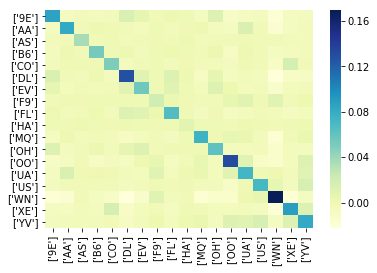

In [16]:
lablist=multi.giveLayersLabels()
sns_plot=sns.heatmap(np.transpose(matcov),cmap="YlGnBu",xticklabels=lablist,yticklabels=lablist)
fig = sns_plot.get_figure()
fig.savefig("matcov.pdf")
plt.show()

In [17]:
valpcov,vectpcov=valeurPropreMax(np.transpose(matcov),1000)
print(valpcov)

0.19526429704721163


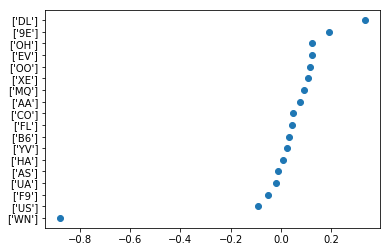

0.19526429704721163


In [18]:
l=SortedCollection(iterable=lablist,key = lambda lab: vectpcov[lablist.index(lab)])
vectcova,labo2=l.listsSorted()

plt.plot(labo2,vectcova,'o')
plt.savefig("covscoresplanes.pdf")
plt.show()

print(valpcov)

## Test: covariance valeur propre minimale

In [19]:
vp,vectpro=np.linalg.eig(matcov)

taux=[matintric[i][i] for i in range(len(matcov))]

print(vp,vectpro)

for i in range(len(vectpro)):
    esp=0
    for j in range(len(vectpro[i])):
        esp=esp+vectpro[i][j]*taux[j]
    print("esp",esp, "lambda", vp[i])
    
esp_glob=0
for i in range(len(taux)):
    esp_glob=esp_glob+taux[i]
print("esperance globale=",esp_glob)
print("variance globale = ", )

[0.1952643  0.15943777 0.12973022 0.00886946 0.01684691 0.10450901
 0.09719196 0.02884473 0.08736607 0.0407632  0.0411341  0.04645012
 0.07671392 0.07407974 0.05317774 0.05735684 0.06013359 0.06593479] [[-1.90196847e-01  2.63489869e-01 -5.00193392e-02  2.48765981e-02
  -1.73117588e-02 -3.08634368e-01 -2.81619450e-01  2.13742334e-01
   3.54970163e-01 -9.39081326e-02  1.01280904e-01  1.83509414e-01
   5.92860618e-01  1.38293403e-01 -4.18236047e-02 -1.46411980e-01
  -3.13119338e-01 -1.15342475e-02]
 [-7.62700893e-02 -3.58771235e-02  1.51693182e-01  1.48910504e-02
   1.54683724e-02  6.57390576e-01 -1.61745139e-01  2.01729986e-01
  -1.43385663e-01 -1.57283668e-03  4.14469199e-02  1.74967140e-01
   2.60315942e-01 -1.75461468e-01 -1.26328348e-01  4.92785144e-01
  -2.12328549e-01 -1.22805441e-01]
 [ 1.07347033e-02 -4.10577011e-03  2.08737771e-02 -2.08047778e-02
  -4.72605532e-02  1.39405252e-02 -5.59164813e-02  7.48754230e-01
  -3.75021140e-02  2.29871969e-01 -3.41562765e-01 -4.72221725e-01
  

## Tests precision

In [20]:
matprec=np.linalg.inv(matcov)
#for i in range(len(matprec)):
#    matprec[i][i]=0

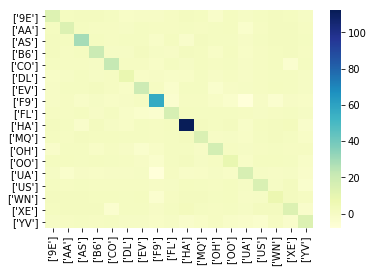

In [21]:
lablist=multi.giveLayersLabels()
sns_plot=sns.heatmap(np.transpose(matprec),cmap="YlGnBu",xticklabels=lablist,yticklabels=lablist)
fig = sns_plot.get_figure()
fig.savefig("matcov.pdf")
plt.show()

In [22]:
valpprec,vectpprec=valeurPropreMax(np.transpose(matprec),1000)
print(1/valpprec)

0.008869459392863072


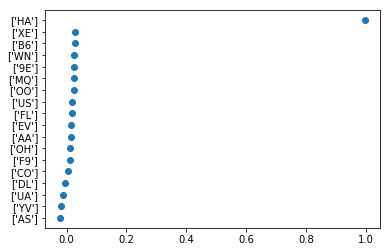

112.74644323921966


In [23]:
l=SortedCollection(iterable=lablist,key = lambda lab: vectpprec[lablist.index(lab)])


vectcova,labo2=l.listsSorted()

plt.plot(labo2,vectcova,'o')
plt.savefig("precscoresplanes.pdf")
plt.show()

print(valpprec)

## Next VP

["['9E']", "['AA']", "['AS']", "['B6']", "['CO']", "['DL']", "['EV']", "['F9']", "['FL']", "['HA']", "['MQ']", "['OH']", "['OO']", "['UA']", "['US']", "['WN']", "['XE']", "['YV']"]


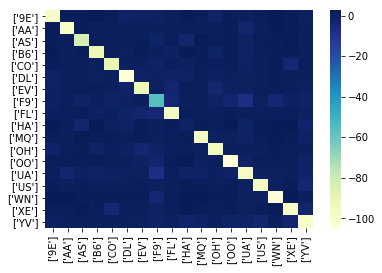

In [24]:
matprec2=matprec-valpprec*np.eye(18)

lablist=multi.giveLayersLabels()
print(lablist)
sns_plot=sns.heatmap(np.transpose(matprec2),cmap="YlGnBu",xticklabels=lablist,yticklabels=lablist)
fig = sns_plot.get_figure()
fig.savefig("matcov.pdf")
plt.show()


In [25]:
valpp2,vectpp2=valeurPropreMax(np.transpose(matprec2),1000)

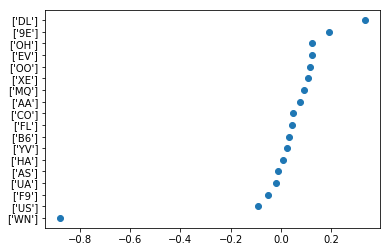

220.37162255482536


In [26]:
l=SortedCollection(iterable=lablist,key = lambda lab: vectpp2[lablist.index(lab)])


vectcova,labo2=l.listsSorted()

plt.plot(labo2,vectcova,'o')
#plt.savefig("precscoresplanes.pdf")
plt.show()

print(valpp2+valpprec)

# Random walks

A step: to go on, a passenger will chose among all the possibles links he can take. Each link corresponds to a company and a destination.

For instance, from `['Montgomery Regional (Dannelly Field) Airport', '32.30059814', '-86.39399719']`
we can reach with the same probability:
```
['Hartsfield Jackson Atlanta International Airport', '33.6367', '-84.428101'] with Endeavor Air Inc.
['Hartsfield Jackson Atlanta International Airport', '33.6367', '-84.428101'] with SkyWest Airlines Inc.
['Ronald Reagan Washington National Airport', '38.8521', '-77.037697'] with PSA Airlines Inc.
['Dallas Fort Worth International Airport', '32.896801', '-97.038002'] with Envoy Air
```


In [27]:
def step(pos0,airportl,m,t,prints=False):
    if prints==True:
        print(dicoAir[pos0])
    bloque=False
    possibleDest={}
    listDest=[]
    car="none"
    for link in m.giveLinks().giveListOfLinks():
        if link.giveNodes()[0].giveNode()==pos0:
            dest=link.giveNodes()[1].giveNode()
            if not dest in listDest:
                listDest.append(dest)
                possibleDest[dest]=[]
            possibleDest[dest].append(link)
            #print(link.giveLabel())
            #print(dicoAir[(link.giveLabel()[1])],dicoCarreer[link.giveLabel()[2][0]])
    if len(listDest)==0:
        bloque=True
        pos1=pos0
        print("no neighbours")
        t1=t
    else:
        #print("----------------------------")
        li=randint(0,len(listDest)-1)
        operListe=possibleDest[listDest[li]]
        link0i=randint(0,len(operListe)-1)
        link0=operListe[link0i]
        #link0.printLink()
        #print(link0.giveLabel())
        pos1=link0.giveNodes()[1].giveNode()
        intervalsL=link0.giveIntervals()
        i=0
        car=link0.giveLabel()[2][0]
        while i<len(intervalsL) and intervalsL[i].begining()<t :
            i=i+1
        if i==len(intervalsL):
            bloque=True
            t1=t
            print("timeout")
        else:
            t1=intervalsL[i].end()
    return(pos1,t1,car,bloque)

pos0=airportl[randint(0,len(airportl)-1)]
step(pos0,airportl,m,0)

('LAS', 1050, 'WN', False)

From that, we compute the random walk: 

In [28]:
def randomWalk(airportl,m,t,collect="coverage",prints=False,boucles=1):
    pos0=airportl[randint(0,len(airportl)-1)]
    t=0
    bloque=False
    i=0
    b=0
    if collect=="coverage":
        airports=np.array([0 for i in range(len(airportl))])
        compagnies=np.array([0 for i in range(len(carL))])
    if collect=="firstTimeToReach":
        airports=np.array([tend for i in range(len(airportl))])
        compagnies=np.array([tend for i in range(len(carL))])
    while bloque==False and b<boucles:
        if prints==True:
            print(pos0,t)
        pos0,t,car,bloque=step(pos0,airportl,m,t,prints=prints)
        if bloque==True:
            b=b+1
            t=0
            bloque=False
        if collect=="coverage":
            airports[airportl.index(pos0)]=airports[airportl.index(pos0)]+1
            compagnies[carL.index(car)]=compagnies[carL.index(car)]+1
        if collect=="firstTimeToReach":
            if airports[airportl.index(pos0)]==tend:
                airports[airportl.index(pos0)]=t
            if compagnies[carL.index(car)]== tend:
                compagnies[carL.index(car)]=t
        i=i+1
    return([pos0,t,airports,compagnies])

randomWalk(airportl,m,0,prints=True,boucles=10)

PDX 0
['Portland International Airport', '45.58869934', '-122.5979996']
EUG 730
['Mahlon Sweet Field', '44.12459945678711', '-123.21199798583984']
SLC 947
['Salt Lake City International Airport', '40.78839874267578', '-111.97799682617188']
GCC 2247
['Gillette Campbell County Airport', '44.348899841299996', '-105.539001465']
RKS 3339
['Southwest Wyoming Regional Airport', '41.5942', '-109.065001']
GCC 4219
['Gillette Campbell County Airport', '44.348899841299996', '-105.539001465']
DEN 4865
['Denver International Airport', '39.861698150635', '-104.672996521']
timeout
MCI 0
['Kansas City International Airport', '39.2976', '-94.713898']
DFW 465
['Dallas Fort Worth International Airport', '32.896801', '-97.038002']
BNA 835
['Nashville International Airport', '36.1245002746582', '-86.6781997680664']
CLT 1273
['Charlotte Douglas International Airport', '35.2140007019043', '-80.94309997558594']
MIA 1467
['Miami International Airport', '25.79319953918457', '-80.29060363769531']
JAX 2495
['Jack

ABQ 35350
['Albuquerque International Sunport', '35.040199', '-106.609001']
IAD 36848
['Washington Dulles International Airport', '38.94449997', '-77.45580292']
DAY 37098
['James M Cox Dayton International Airport', '39.902400970458984', '-84.21939849853516']
IAD 37267
['Washington Dulles International Airport', '38.94449997', '-77.45580292']
LAS 38085
['McCarran International Airport', '36.08010101', '-115.1520004']
MSP 38505
['Minneapolis-St Paul International/Wold-Chamberlain Airport', '44.882', '-93.221802']
SAN 39552
['San Diego International Airport', '32.7336006165', '-117.190002441']
timeout
CLE 0
['Cleveland Hopkins International Airport', '41.4117012024', '-81.8498001099']
BWI 748
['Baltimore/Washington International Thurgood Marshall Airport', '39.1754', '-76.668297']
MEM 6275
['Memphis International Airport', '35.04240036010742', '-89.97669982910156']
IND 6434
['Indianapolis International Airport', '39.7173', '-86.294403']
MCI 6890
['Kansas City International Airport', '39.

IAH 30648
['George Bush Intercontinental Houston Airport', '29.984399795532227', '-95.34140014648438']
HSV 30985
['Huntsville International Carl T Jones Field', '34.637199401855', '-86.775100708008']
DFW 32190
['Dallas Fort Worth International Airport', '32.896801', '-97.038002']
HNL 32620
['Daniel K Inouye International Airport', '21.32062', '-157.924228']
IAH 33525
['George Bush Intercontinental Houston Airport', '29.984399795532227', '-95.34140014648438']
MEM 33940
['Memphis International Airport', '35.04240036010742', '-89.97669982910156']
HSV 34069
['Huntsville International Carl T Jones Field', '34.637199401855', '-86.775100708008']
IAH 34312
['George Bush Intercontinental Houston Airport', '29.984399795532227', '-95.34140014648438']
LBB 34497
['Lubbock Preston Smith International Airport', '33.663601', '-101.822998']
AUS 35010
['Austin Bergstrom International Airport', '30.194499969482422', '-97.6698989868164']
ORD 35260
["Chicago O'Hare International Airport", '41.9786', '-87.9

MCO 6573
['Orlando International Airport', '28.429399490356445', '-81.30899810791016']
DFW 7089
['Dallas Fort Worth International Airport', '32.896801', '-97.038002']
IAD 7895
['Washington Dulles International Airport', '38.94449997', '-77.45580292']
SFO 8129
['San Francisco International Airport', '37.61899948120117', '-122.375']
CEC 8266
['Jack Mc Namara Field Airport', '41.78020096', '-124.2369995']
SFO 9280
['San Francisco International Airport', '37.61899948120117', '-122.375']
JFK 9915
['John F Kennedy International Airport', '40.63980103', '-73.77890015']
ATL 10608
['Hartsfield Jackson Atlanta International Airport', '33.6367', '-84.428101']
PNS 10983
['Pensacola Regional Airport', '30.473400115967', '-87.186599731445']
CLT 12329
['Charlotte Douglas International Airport', '35.2140007019043', '-80.94309997558594']
STL 12472
['St Louis Lambert International Airport', '38.748697', '-90.370003']
EWR 13769
['Newark Liberty International Airport', '40.692501068115234', '-74.168701171

['SAN',
 0,
 array([ 0,  0,  3,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0, 13,  1,
         3,  1,  0,  1,  3,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  2,  0,
         3,  0,  0,  0,  0,  0,  1,  0,  3,  1, 11,  0,  0,  1,  0,  0,  1,
         1,  0,  0,  0,  0,  0,  5,  0,  7,  1,  1,  0,  1,  0,  0,  0,  0,
         3,  0,  0,  2,  3,  0,  2,  9, 13,  0,  0,  0,  2,  7,  1,  1,  0,
         3,  0,  1,  0,  0,  8,  2,  0,  0,  2,  0,  0,  0,  4,  0,  0,  0,
         1,  0,  5,  0,  0,  0,  0,  1,  2,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  1,  5,  2,  0,  0,  2,  4,  5,  0,  1,  0,  5,  0,  1,  0,  0,
         0,  0,  0,  1,  6,  0,  2,  0,  0,  8,  7,  2,  0,  0,  0,  3,  2,
         1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  5,  7,  1,  4,  0, 11,  0,
         1,  0,  1,  0,  7,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  6,
         2,  0,  0,  0,  0,  2,  3,  2,  1,  0,  2, 13,  1,  0,  0,  0,  3,
         5,  0,  1,  3,  8,  0,  0,  3,  0,  2,  0,  1,  0,  0,  1,  3,  0,


We compute then a great amount of random walks, collecting several informations:

- the coverage

In [29]:
covAirports=np.array([0 for i in range(len(airportl))])
covCompagnies=np.array([0 for i in range(len(carL))])
airports=np.array([0 for i in (airportl)])
t=0
for i in range(10):
    print("randomwalk n", i)
    vect=randomWalk(airportl,m,t,boucles=10)
    airports=vect[2]
    compagnies=vect[3]
    covAirports=np.add(covAirports,airports)
    covCompagnies=np.add(covCompagnies,compagnies)

randomwalk n 0
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 1
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 2
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 3
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 4
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 5
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 6
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 7
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 8
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 9
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout


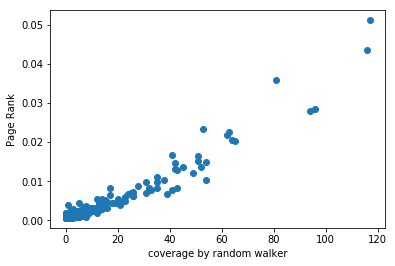

In [30]:
axes = plt.gca()
plt.plot(covAirports,pr,'o')
axes.set_ylabel('Page Rank')
axes.set_xlabel('coverage by random walker')
plt.savefig("prVSrw.pdf")
plt.show()

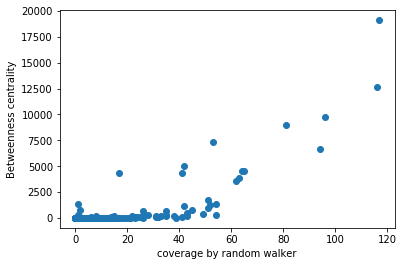

In [31]:
axes = plt.gca()
plt.plot(covAirports,bt,'o')
axes.set_ylabel('Betweenness centrality')
axes.set_xlabel('coverage by random walker')
plt.savefig('bcVScovrw.pdf')
plt.show()

[222 179  84  93  93 298 103  31 135  21 220 122 320 124 160 500 164 145]
[0.17494779 0.19971572 0.10393828 0.16292826 0.16649707 0.22668449
 0.24304103 0.469936   0.23016001 0.1917321  0.18862926 0.21821667
 0.23509145 0.34025339 0.21378433 0.15536274 0.17112429 0.30007107]


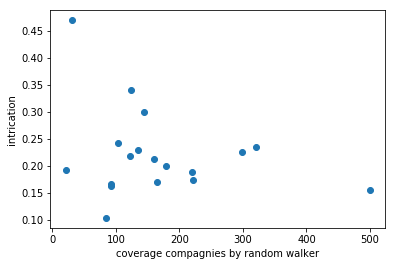

In [32]:
print(covCompagnies)
print(vectp)
axes=plt.gca()
plt.plot(covCompagnies,vectp,'o')
axes.set_ylabel('intrication')
axes.set_xlabel('coverage compagnies by random walker')
plt.show()


- the first time to reach

In [33]:
ftrAirports=np.array([0 for i in range(len(airportl))])
ftrCompagnies=np.array([0 for i in range(len(carL))])
airports=np.array([0 for i in (airportl)])
t=0
for i in range(10):
    print("randomwalk n", i)
    vect=randomWalk(airportl,m,t,collect="firstTimeToReach",boucles=10)
    airports=vect[2]
    compagnies=vect[3]
    ftrAirports=np.add(covAirports,airports)
    ftrCompagnies=np.add(covCompagnies,compagnies)

randomwalk n 0
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 1
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 2
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 3
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 4
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 5
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 6
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 7
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 8
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 9
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout


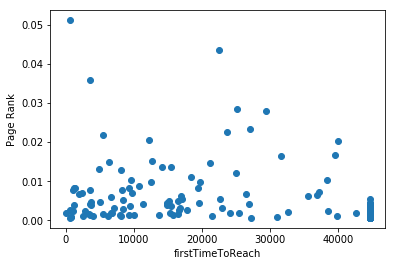

In [34]:
axes = plt.gca()
plt.plot(ftrAirports,pr,'o')
axes.set_ylabel('Page Rank')
axes.set_xlabel('firstTimeToReach')
plt.show()

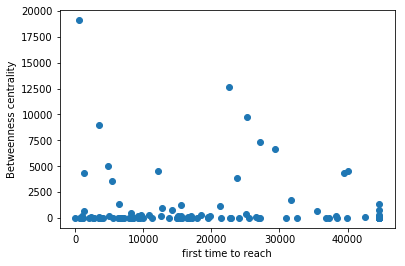

In [35]:
axes = plt.gca()
plt.plot(ftrAirports,bt,'o')
axes.set_ylabel('Betweenness centrality')
axes.set_xlabel('first time to reach')
plt.show()

In [36]:
nnodes=[121,102,70,68,145,101,90,120,18,134,43,95,239,108,85,103,87]
nlinks=[488,721,326,362,834,368,522,614,62,419,366,325,1358,715,1378,335,661]

['9E', 'AA', 'AS', 'B6', 'CO', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'OH', 'OO', 'UA', 'US', 'WN', 'XE', 'YV']


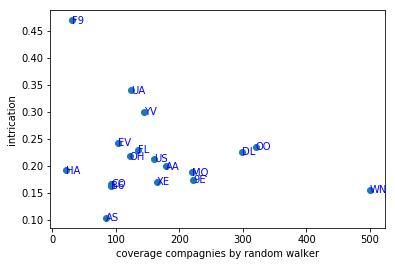

In [37]:
axes=plt.gca()
plt.plot(covCompagnies,vectp,'o')
axes.set_ylabel('intrication')
axes.set_xlabel('coverage compagnies by random walker')
print(carL)
ni=0
for i in carL:
    text = axes.text(covCompagnies[ni],vectp[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()


In [38]:
cov2=[covCompagnies[i]/nnodes[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(cov2,vectp,'o')
axes.set_ylabel('intrication')
axes.set_xlabel('coverage compagnies by random walker')
print(cov2)
ni=0
for i in carL:
    text = axes.text(cov2[ni],vectp[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

IndexError: list index out of range

In [39]:
cov3=[-covCompagnies[i]/nlinks[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(cov3,vectp,'o')
axes.set_ylabel('intrication')
axes.set_xlabel('- coverage compagnies by random walker divided by number of links in the compagny')
print(cov3)
ni=0
for i in carL:
    text = axes.text(cov3[ni],vectp[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

IndexError: list index out of range

In [40]:
nlinks2=[nlinks[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(nlinks2,vectp,'o')
axes.set_ylabel('intrication')
axes.set_xlabel('number of links')
print(cov3)
ni=0
for i in carL:
    text = axes.text(nlinks2[ni],vectp[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

IndexError: list index out of range

## Covariance

[ 0.19019685  0.07627009 -0.0107347   0.03319548  0.04627495  0.33221475
  0.12162779 -0.05351077  0.04525019  0.00770829  0.09136927  0.12366894
  0.11458389 -0.02205089 -0.0922131  -0.87585615  0.10517555  0.02391481]


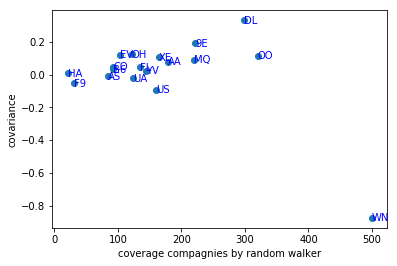

In [41]:
cov3=[covCompagnies[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(cov3,vectpcov,'o')
axes.set_ylabel('covariance')
axes.set_xlabel('coverage compagnies by random walker')
print(vectpcov)
ni=0
for i in carL:
    text = axes.text(cov3[ni],vectpcov[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

## Precision

[222, 179, 84, 93, 93, 298, 103, 31, 135, 21, 220, 122, 320, 124, 160, 500, 164, 145]


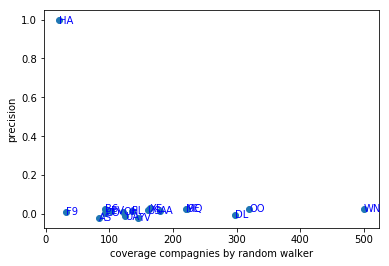

In [42]:
cov3=[covCompagnies[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(cov3,vectpprec,'o')
axes.set_ylabel('precision')
axes.set_xlabel('coverage compagnies by random walker')
print(cov3)
ni=0
for i in carL:
    text = axes.text(cov3[ni],vectpprec[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

# Probas de transition

L'idée est de calculer, une fois arrivé à un aéroport $a$ à un temps $t_0$, la probabilité de prendre les vols à suivre en fonction du temps qu'il faut attendre pour cela. On considère qu'on peut prendre un lien qu'un certain temps après le temps $t2$ étudié, dans ce qu'on appellera une fenêtre. On va favoriser les vols partant le plus tôt. La probabilité de prendre un vol partant pour $b$ à $t$ sera donc: $p((t,a,b))=(t2-t)/c \times \delta_{t0<t<t2}$, avec $\sum_{\forall (t,a,b)\in E} p((t,a,b))=1$.

En calculant cela pour tous les aéroports de départ, nous obtenons une matrice d'adjacence entre les aéroports. Nous pouvons donc en tirer un vecteur propre pour la valeur propre 1, et un classement des aéroports les plus "influents", ceux dans lesquels il est le plus probable qu'un voyageur aléatoire atterrisse.


In [43]:
pt1,pt2=m.calculMatriceProbaTransition(7*60,60*24)
#m.printMS()
print(pt1)
matAirp=np.array(pt1)
matAirp=np.transpose(matAirp)
print(len(pt1))
valptrans,vectptrans=valeurPropreMax(matAirp,100000)
print(vectptrans)

v,vect=np.linalg.eig(matAirp)
print(sorted(v))

['EV']
6
['EV']
6
['XE']
16
['9E']
0
['9E']
0
['FL']
8
['OO']
12
['YV']
17
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['DL']
5
['DL']
5
['DL']
5
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['OO']
12
['OO']
12
['OO']
12
['UA']
13
['WN']
15
['WN']
15
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['WN']
15
['WN']
15
['WN']
15
['UA']
13
['CO']
4
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['WN']
15
['WN']
15
['WN']
15
['OO']
12
['OO']
12
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['DL']
5
['DL']
5
['WN']
15
['WN']
15
['MQ']
10
['MQ']
10
['WN']
15
['US']
14
['US']
14
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['YV']
17
['YV']
17
['YV']
17
['WN']
15
['WN']
15
['WN']
15
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['EV']
6
['EV']
6
['OO']
12
['OO']
12
['OO']
12
[

['EV']
6
['FL']
8
['FL']
8
['FL']
8
['OO']
12
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['EV']
6
['EV']
6
['EV']
6
['OH']
11
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['DL']
5
['DL']
5
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['OO']
12
['9E']
0
['9E']
0
['9E']
0
['9E']
0
['OH']
11
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['DL']
5
['DL']
5
['EV']
6
['EV']
6
['WN']
15
['B6']
3
['WN']
15
['WN']
15
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['F9']
7
['F9']
7
['F9']
7
['OO']
12
['OO']
12
['WN']
15
['WN']
15
['YV']
17
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['

['AA']
1
['AA']
1
['AA']
1
['AA']
1
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['WN']
15
['WN']
15
['WN']
15
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['FL']
8
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['MQ']
10
['OH']
11
['WN']
15
['WN']
15
['WN']
15
['FL']
8
['UA']
13
['UA']
13
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['AA']
1
['AA']
1
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['WN']
15
['WN']
15
['WN']
15
['DL']
5
['DL']
5
['FL']
8
['WN']
15
['WN']
15
['MQ']
10
['MQ']
10
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['UA']

['DL']
5
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['9E']
0
['9E']
0
['9E']
0
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['DL']
5
['EV']
6
['EV']
6
['EV']
6
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['XE']
16
['XE']
16
['AA']
1
['AA']
1
['MQ']
10
['9E']
0
[

10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['XE']
16
['MQ']
10
['MQ']
10
['MQ']
10
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['AA']
1
['AA']
1
['AA']
1
['MQ']
10
['MQ']
10
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['OH']
11
['OH']
11
['OH']
11
['OH']
11
['AA']
1
['AA']
1
['MQ']
10
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['F9']
7
['F9']
7
['F9']
7
['F9']
7
['F9']
7
['UA']
13
['UA']
13
['UA']
13
['MQ

['WN']
15
['WN']
15
['AA']
1
['OO']
12
['OO']
12
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['OO']
12
['OO']
12
['9E']
0
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['EV']
6
['EV']
6
['EV']
6
['MQ']
10
['9E']
0
['MQ']
10
['MQ']
10
['MQ']
10
['EV']
6
['EV']
6
['XE']
16
['9E']
0
['CO']
4
['CO']
4
['CO']
4
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['XE']
16
['XE']
16
['XE']
16
['CO']
4
['CO']
4
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['CO']
4
['CO']
4
['XE']
16
['CO']
4
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['XE']
16
['XE']
16
['XE']
16
['XE']
16
[

['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['WN']
15
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['OO']
12
['OO']
12
['AA']
1
['AA']
1
['OH']
11
['XE']
16
['YV']
17
['XE']
16
['XE']
16
['XE']
16
['9E']
0
['9E']
0
['MQ']
10
['XE']
16
['XE']
16
['UA']
13
['9E']
0
['DL']
5
['DL']
5
['DL']
5
['EV']
6
['FL']
8
['FL']
8
['FL']
8
['OO']
12
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['UA']
13
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['UA']
13
['UA']
13
['UA']
13
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['XE']
16
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['9E']
0
['9E']
0
['XE']
16
['XE']
16
['YV']
17
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['YV']
17
['XE']
16
['YV']
17
['UA']
13
['UA']
13
['XE']
16
['XE']
16
['XE']
16
['YV'

10
['MQ']
10
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['WN']
15
['WN']
15
['WN']
15
['9E']
0
['9E']
0
['9E']
0
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['WN']
15
['WN']
15
['WN']
15
['B6']
3
['WN']
15
['WN']
15
['XE']
16
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['OH']
11
['US']
14
['AA']
1
['AA']
1
['AA']
1
['DL']
5
['DL']
5
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['WN']
15
['WN']
15
['WN']
15
['XE']
16
['WN']
15
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['B6']
3
['B6']
3
['B6']
3
['WN']
15
['OH']
11
['OH']
11
['OH']
11
['9E']
0
['9E']
0
['9E']
0
['MQ']
10
['UA']
13
['UA']
13
['WN']
15
['US']
14
['US']
14
['US']
14
['US']
14
['WN']
15
['WN']
15
['OH']
11
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['B6']
3
['B6']
3
['B6']
3
['OH']
11
['OH']
11
['OH']
11
['OH']
11
['OH']
11
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['B6']
3


['WN']
15
['AA']
1
['AA']
1
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['DL']
5
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['B6']
3
['B6']
3
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['AA']
1
['DL']
5
['UA']
13
['UA']
13
['AA']
1
['AA']
1
['AA']
1
['DL']
5
['DL']
5
['DL']
5
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['US']
14
['US']
14
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['AA']
1
['DL']
5
['UA']
13
['UA']
13
['WN']
15
['WN']
15
['AA']
1
['DL']
5
['DL']
5
['UA']
13
['UA']
13
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['DL']
5
['DL']
5
['DL']
5
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA

['WN']
15
['WN']
15
['WN']
15
['FL']
8
['WN']
15
['FL']
8
['WN']
15
['WN']
15
['WN']
15
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['B6']
3
['WN']
15
['DL']
5
['DL']
5
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['DL']
5
['DL']
5
['DL']
5
['FL']
8
['FL']
8
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['FL']
8
['WN']
15
['WN']
15
['WN']
15
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['FL']
8
['CO']
4
['CO']
4
['CO']
4
['CO']
4
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['FL']
8
['WN']
15
['WN']
15
['WN']
15
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['FL']
8
['FL']
8
['US']
14
['US']

['DL']
5
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['9E']
0
['9E']
0
['9E']
0
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['9E']
0
['MQ']
10
['MQ']
10
['OO']
12
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['OO']
12
['OO']
12
['OO']
12
['YV']
17
['YV']
17
['YV']
17
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['XE']
16
['OO']
12
['OO']
12
['YV']
17
['MQ']
10
['MQ']
10
['9E']
0
['DL']
5
['DL']
5
['DL']
5
['XE']
16
['9E']
0
['DL']
5
['DL']
5
['DL']
5
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['OO']
12
['OO']
12
['YV']
17
['YV']
17
['YV']
17
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['DL']
5
['DL']
5
['9E']
0
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['FL']
8
['FL']
8
['FL']
8
['9E']
0
['9E']
0
['OH']
11
['9E']
0
['DL']
5
['DL']
5
['9E']
0
['DL']
5
['DL']
5
['9E']
0
['9E']
0
['9E

1
['AA']
1
['AA']
1
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['B6']
3
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['OO']
12
['OO']
12
['OO']
12
['AA']
1
['AA']
1
['AA']
1
['MQ']
10
['MQ']
10
['OO']
12
['OO']
12
['UA']
13
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['UA']
13
['YV']
17
['9E']
0
['DL']
5
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['OO']
12
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['MQ']
10
['MQ']
10
['MQ']
10
['OO']
12
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['OO']
12
['OO']
12
['OO']
12
['YV']
17
['YV']
17
['YV']
17
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['DL']

['OO']
12
['UA']
13
['UA']
13
['UA']
13
['US']
14
['US']
14
['US']
14
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['US']
14
['US']
14
['US']
14
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['DL']
5
['DL']
5
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['US']
14
['US']
14
['US']
14
['US']
14
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['YV']
17
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['US']
14
['US']
14
['US']
14
['US']
14
['US']
14
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['YV']
17
['YV']
17
['US']
14
['US']
14
['WN']
15
['WN']
15
['WN']
15
['YV']
17
['YV']
17
['US']
14
['US']
14
['WN']
15
['WN']
15
['WN']
15
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['OO']
12
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['

17
['YV']
17
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['EV']
6
['9E']
0
['9E']
0
['9E']
0
['OO']
12
['OO']
12
['YV']
17
['YV']
17
['YV']
17
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['YV']
17
['YV']
17
['YV']
17
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['9E']
0
['9E']
0
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['EV']
6
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['XE']
16
['YV']
17
['OH']
11
['OO']
12
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['MQ']
10
['OH']
11
['XE']
16
['XE']
16
['XE']
16
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['OH']
11
['OH']
11
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['MQ']
10
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['AS']
2
['CO']
4
['CO']
4
['CO']
4
['AS']
2
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['AS']
2
['WN']
15
['WN']

3
['B6']
3
['B6']
3
['DL']
5
['DL']
5
['AA']
1
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['B6']
3
['FL']
8
['FL']
8
['FL']
8
['FL']
8
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['UA']
13
['AA']
1
['US']
14
['US']
14
['US']
14
['AA']
1
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['WN']
15
['DL']
5
['OO']
12
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['DL']
5
['DL']
5
['OO']
12
['OO']
12
['WN']
15
['DL']
5
['DL']
5
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['DL']
5
['DL']
5
['WN']
15
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['DL']
5
['F9']
7
['F9']
7
['F9']
7
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['UA']
13
['UA']
13
['UA']
13
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['AA']
1
['AA']
1
['AA']
1
[

['EV']
6
['EV']
6
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['OO']
12
['OO']
12
['UA']
13
['UA']
13
['WN']
15
['WN']
15
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['MQ']
10
['9E']
0
['WN']
15
['WN']
15
['WN']
15
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['XE']
16
['WN']
15
['OO']
12
['9E']
0
['9E']
0
['9E']
0
['OH']
11
['AA']
1
['MQ']
10
['MQ']
10
['MQ']
10
['WN']
15
['WN']
15
['OO']
12
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['DL']
5
['DL']
5
['F9']
7
['F9']
7
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['UA']
13
['WN']
15
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['AA']
1
['CO']
4
['CO']
4
['XE']
16
['XE']
16
['XE']
16
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['OO']
12
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['WN']
15
['DL']
5
['AA']
1
['AA']
1
['AA']
1
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['YV']
17
['WN']
15
['WN']
15
[

[7.44804256e-27 6.47289281e-27 8.65301226e-26 9.66558305e-28
 8.16784998e-27 3.02600413e-27 3.62302195e-03 1.02493153e-27
 8.13300345e-27 4.44962383e-27 2.65744628e-26 1.01937390e-27
 1.63446630e-26 2.89153697e-26 2.20709328e-26 8.30766334e-25
 1.18519862e-26 9.96629950e-26 1.13505069e-26 3.83216623e-27
 6.52076332e-27 5.62829608e-26 1.15821395e-27 7.38972216e-27
 7.70402336e-28 3.70934089e-27 4.82007069e-26 1.13142985e-26
 7.48475473e-27 3.62302195e-03 3.62302195e-03 9.03567369e-27
 1.34243235e-25 3.20046681e-26 2.44882693e-25 1.68309206e-27
 5.02551004e-27 6.76045346e-27 3.62302195e-03 1.84973738e-27
 1.93052483e-26 1.33204101e-26 5.92506601e-26 6.72285359e-26
 2.50850169e-25 1.40196519e-26 1.74989973e-26 1.80205085e-26
 2.25124625e-27 9.65006094e-28 2.14384474e-27 7.04405028e-27
 1.72688945e-27 2.67143237e-26 3.27869263e-27 1.64345978e-26
 3.98053340e-27 1.18338537e-25 3.12171665e-27 2.93972661e-25
 6.36644016e-26 4.21153061e-27 2.98736471e-27 3.64161021e-26
 4.99889919e-27 1.877509

In [44]:
print(valptrans)

1.0


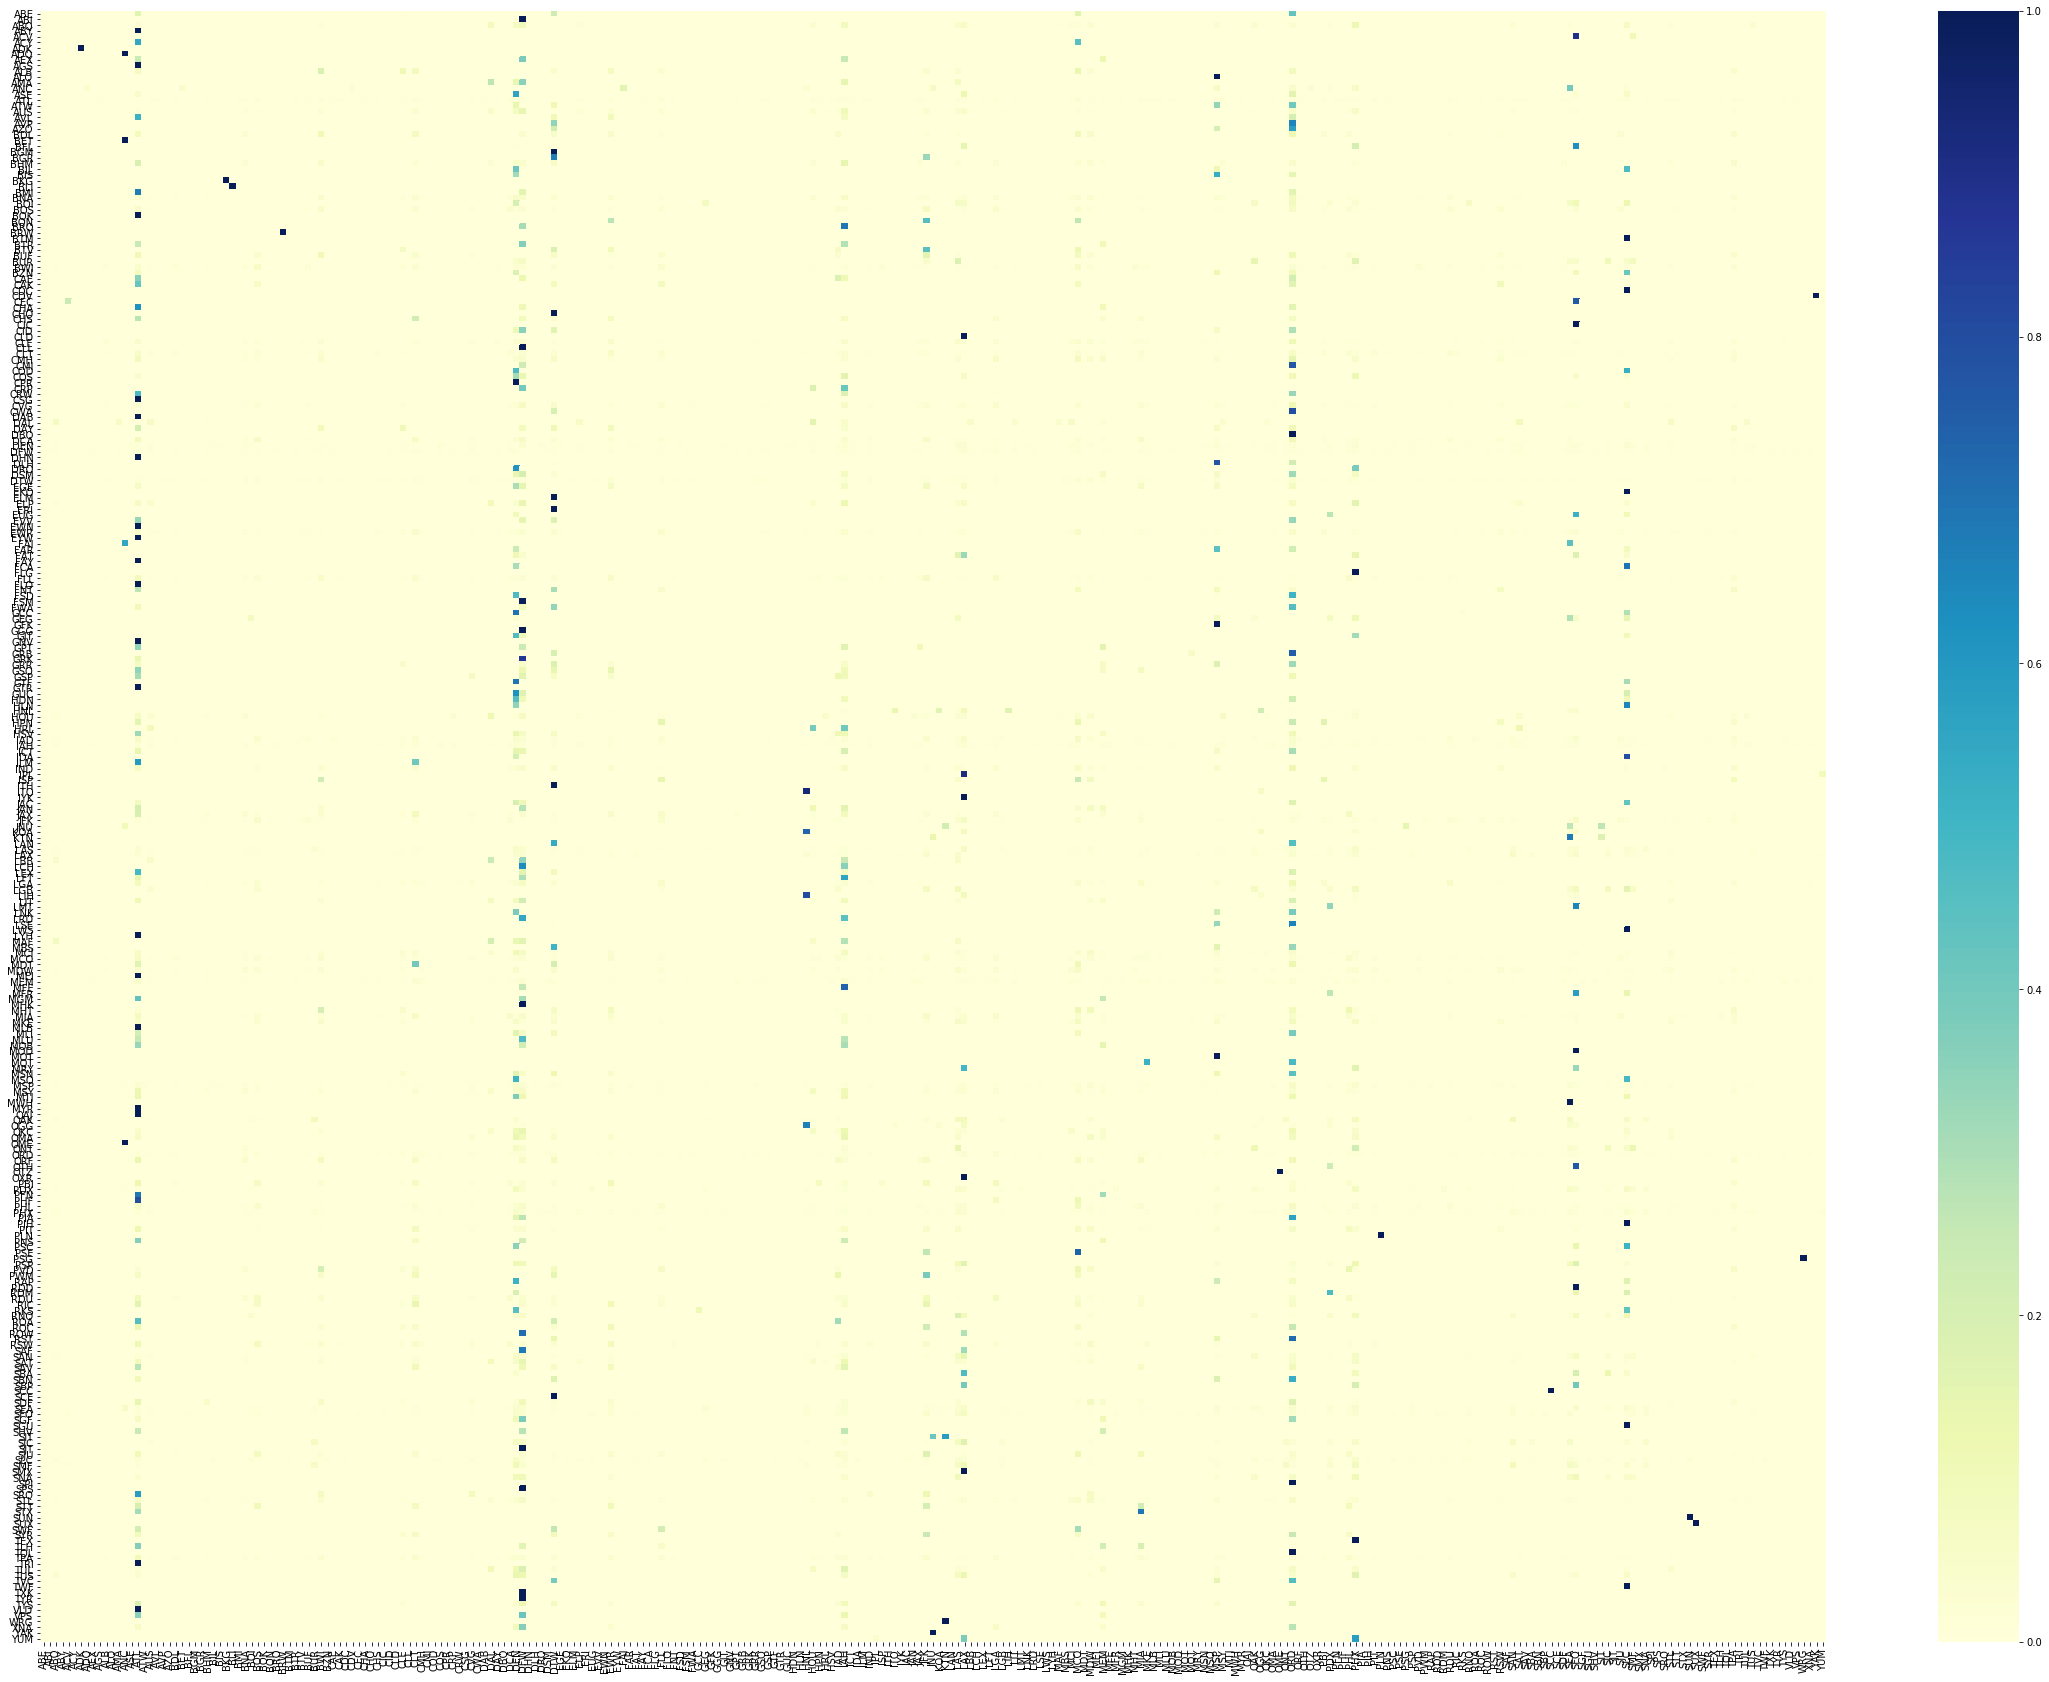

In [45]:
sns_plot=sns.heatmap(np.transpose(matAirp),cmap="YlGnBu",xticklabels=airportl,yticklabels=airportl)
fig = sns_plot.get_figure()
fig.set_size_inches(40,30)
plt.show()

Comparaison avec le Random walk. Ca marche quand le temps est très grand (1 jour)

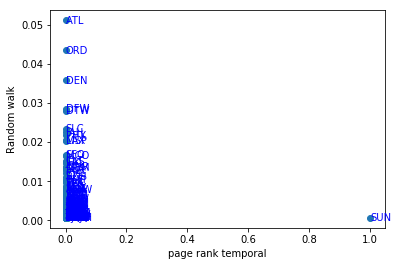

In [46]:
axes = plt.gca()
plt.plot(vectptrans,pr,'o')
axes.set_ylabel('Random walk')
axes.set_xlabel('page rank temporal')
plt.savefig("randwalkVStpr.pdf")
ni=0
for i in airportl:
    text = axes.text(vectptrans[ni],pr[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

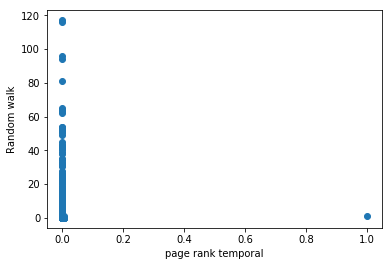

In [47]:
axes = plt.gca()
plt.plot(vectptrans,covAirports,'o')
axes.set_ylabel('Random walk')
axes.set_xlabel('page rank temporal')
plt.savefig("randwalkVStpr.pdf")
plt.show()

A partir de ça, on va calculer une autre matrice de covariance. On a plein d'échantillons dans pt2. et on peut encore en faire plus sur le temps si on veut.


1.4997752106005988
0.5887094925098738
0.9040107689475142
0.4881159824250584
0.23974298971162766
0.7074938477230218
1.9912167634109261
0.049832177447690425
0.4393366014013199
0.2044740771591497
2.3034866037059816
0.26181194053165585
3.4883628493585213
0.32342376899447955
0.35227914084950307
1.5346229729986411
0.9180503757446089
0.9945879481008927
0.5887094925098738
0.24691817901027716
0.3662893259194576
0.19798427180074588
0.09845732683172959
0.28868828066057406
0.8040756938240352
0.0203364881197908
0.1779480159182721
0.08303515574865847
0.9311592711246386
0.10600890191918376
1.4118696268891027
0.1324402463947878
0.14385868661510454
0.6250111905068273
0.3720705302248065
0.4026473779345551
0.9040107689475142
0.3662893259194576
0.6080557982597355
0.30289176715376354
0.1494133984865777
0.4389357518432462
1.2351417478488032
0.03103128145399057
0.27238608593082847
0.12749635683580027
1.4277354713112522
0.16231825898009375
2.166590371870351
0.20129191182908104
0.21922358716433324
0.9549633550

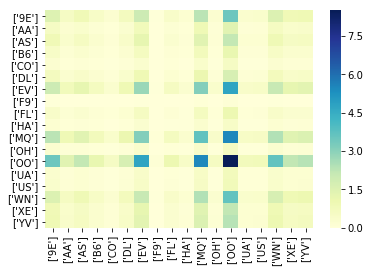

[0.23799015 0.23830125 0.23284586 0.2338402  0.2355127  0.23925538
 0.23807399 0.23127103 0.23510104 0.21874347 0.23892319 0.23081819
 0.23930988 0.23844773 0.23709905 0.23908776 0.23902805 0.23807036]
[0.23799015 0.23830125 0.23284586 0.2338402  0.2355127  0.23925538
 0.23807399 0.23127103 0.23510104 0.21874347 0.23892319 0.23081819
 0.23930988 0.23844773 0.23709905 0.23908776 0.23902805 0.23807036]


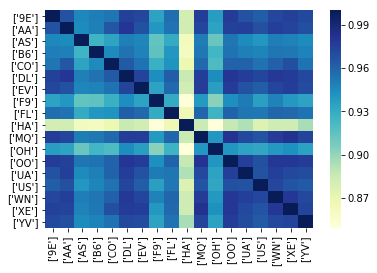

In [48]:
from math import *

matcovtemp=[[0 for j in carL] for i in carL]
avg=[0. for i in carL]

for i in range(len(carL)):
    moy=0
    for k in range(len(airportl)):
        moy+=pt2[k][i]
    avg[i]=moy/(len(carL))

for i in range(len(carL)):
    for j in range(len(carL)):
        moyprod=0
        moyi=0
        moyj=0
        for k in range(len(airportl)):
            moyprod+=(pt2[k][i]-avg[i])*(pt2[k][j]-avg[j])
        print(moyprod/(len(airportl)))
        matcovtemp[i][j]=(moyprod)/(len(pt2))

lablist=multi.giveLayersLabels()
sns_plot=sns.heatmap(np.transpose(matcovtemp),cmap="YlGnBu",xticklabels=lablist,yticklabels=lablist)
plt.show()

for i in range(len(carL)):
    for j in range(len(carL)):
        if i!=j:
            matcovtemp[i][j]=matcovtemp[i][j]/(sqrt(matcovtemp[i][i])*sqrt(matcovtemp[j][j]))
for i in range(len(carL)):
    matcovtemp[i][i]=1


sns_plot=sns.heatmap(np.transpose(matcovtemp),cmap="YlGnBu",xticklabels=lablist,yticklabels=lablist)

vecptransC=[0 for i in carL]
for i in range(len(vecptransC)):
    for j in range(len(vecptransC)):
        vecptransC[i]+=matcovtemp[i][j]

vecptransC=valeurPropreMax(matcovtemp,1000)[1]
print(vecptransC)

print(vecptransC)

[222, 179, 84, 93, 93, 298, 103, 31, 135, 21, 220, 122, 320, 124, 160, 500, 164, 145]


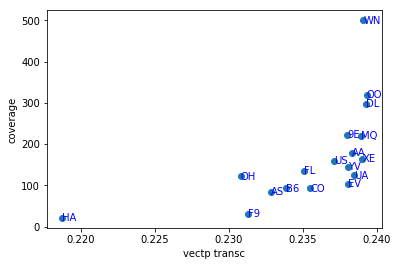

In [49]:
cov3=[covCompagnies[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(vecptransC,cov3,'o')
axes.set_ylabel('coverage')
axes.set_xlabel('vectp transc')
print(cov3)
ni=0
for i in carL:
    text = axes.text(vecptransC[ni],cov3[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

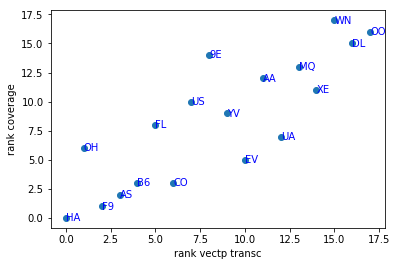

In [50]:
vecptransordo=sorted(vecptransC)
cov3ordo=sorted(cov3)
ordrevecptrans=[vecptransordo.index(vecptransC[i]) for i in range(len(vecptransC))]
ordrecov3=[cov3ordo.index(cov3[i]) for i in range(len(cov3))]
plt.plot(ordrevecptrans,ordrecov3,'o')
axes=plt.gca()
axes.set_ylabel('rank coverage')
axes.set_xlabel('rank vectp transc')
ni=0
for i in carL:
    text = axes.text(ordrevecptrans[ni],ordrecov3[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

[[0.84829721]] [1.23391813]


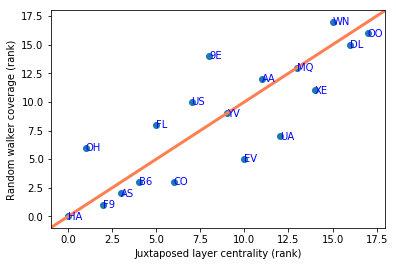

0.6708072565570817


In [51]:
from sklearn import linear_model

import matplotlib.pyplot as plt
import numpy as np
import random

#----------------------------------------------------------------------------------------#
# Step 1: training data

X = ordrevecptrans
Y = ordrecov3

X = np.asarray(X)
Y = np.asarray(Y)

X = X[:,np.newaxis]
Y = Y[:,np.newaxis]

plt.scatter(X,Y)

#----------------------------------------------------------------------------------------#
# Step 2: define and train a model

model = linear_model.LinearRegression()
model.fit(X, Y)

print(model.coef_, model.intercept_)

#----------------------------------------------------------------------------------------#
# Step 3: prediction

x_new_min = -1.0
x_new_max = 18.0

X_NEW = np.linspace(x_new_min, x_new_max, 100)
X_NEW = X_NEW[:,np.newaxis]

#Y_NEW = [model.predict(X_NEW)]
Y_NEW=X_NEW #without prediction : x=y

plt.plot(X_NEW, Y_NEW, color='coral', linewidth=3)


plt.xlim(-1,18)
plt.ylim(-1,18)

#plt.title("Simple Linear Regression using scikit-learn and python 3",fontsize=10)
plt.xlabel('Juxtaposed layer centrality (rank)')
plt.ylabel('Random walker coverage (rank)')

axes=plt.gca()
ni=0
for i in carL:
    text = axes.text(ordrevecptrans[ni],ordrecov3[ni],i,ha="left", va="center", color="b")
    ni=ni+1

plt.savefig("simple_linear_regression2010.pdf", bbox_inches='tight')
plt.show()

#step 4 score 

s=0
for i in range(len(X)):
    s=s+(Y[i]-X[i]*model.coef_-model.intercept_)**2

print(sqrt(s)/(len(X)))

# Nombre de vols par compagnies

NameError: name 'nbvols' is not defined

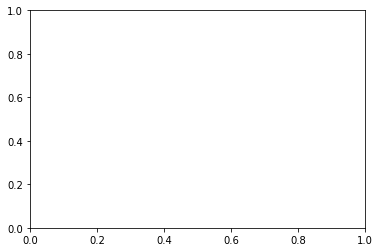

In [52]:
cov3=[covCompagnies[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(nbvols,cov3,'o')
axes.set_ylabel('coverage')
axes.set_xlabel('nbvols')
print(cov3)
ni=0
for i in carL:
    text = axes.text(nbvols[ni],cov3[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

In [ ]:
nbvols=[0 for i in carL]

for link in m.giveLinks().giveListOfLinks():
    nbVols=(len(link.giveIntervals()))
    carIndex=carL.index(link.giveLabel()[2][0])
    nbvols[carIndex]=nbvols[carIndex]+nbVols

print(nbvols)
print(carL)
tot=0
for i in range(len(nbvols)):
    tot=tot+nbvols[i]
print(tot)
plt.plot(carL,nbvols,'o')
plt.show()